# Neural Nerworks. 

### BY: Arash Hosseini Jafari

The purpose of this project is to build and train an neural network to predict a set of classes.

#### Preprocessing: 

The preprocessing for the first part was minimal. In the second section we created new vaiables/features that we fed into our model.

#### Faramework: 

The SKLearn framework was used to perform all machine learning tasks. 

#### Other Packages:

Numpy was used for data handling. Matplotlib was used for basic visualization. Graphviz, Pydotplus, and Ipython were used to visualization.

------------------------------------------

###  Importing all the necessary packages.

In [181]:
from sklearn.preprocessing import LabelEncoder
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

### Visualizing Data Set.
This data set contains a veriety of variables that seem to represent x and y values. The last column represents 3 classes which are R G B, which could be representatives of the color red blue and green.              

In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("train_set.csv")
df.head(5)


,xval,yval,color
0,16.263398,13.299206,r
1,0.775408,23.986692,r
2,29.170503,-3.287474,r
3,6.739044,-28.033329,r
4,3.216100,22.013695,r


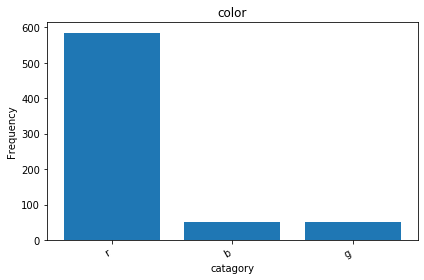

In [183]:
theClasses = ['color']

for catz in theClasses:
    
    # create a figure and axis 
    fig, ax = plt.subplots() 
    # count the occurrence of each class 
    data = df[catz].value_counts() 
    
    # get x and y data 
    points = data.index 
    frequency = data.values 
    # create bar chart 
    ax.bar(points,frequency) 
    # set title and labels 
    ax.set_title(catz) 
    ax.set_xlabel('catagory') 
    ax.set_ylabel('Frequency')
    plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
    fig.tight_layout()

###### There seems to be a large class imbalance:
Red is the more prominent class by far.                                                                    


 * Distribution of the first feature (xval) *



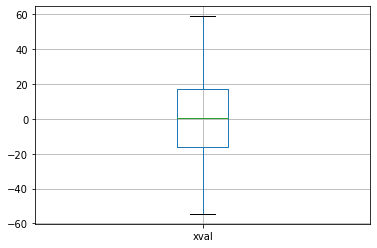

In [184]:
print('\n * Distribution of the first feature (xval) *\n')
df.boxplot(column=['xval'])


 * Distribution of the second feature (yval) *



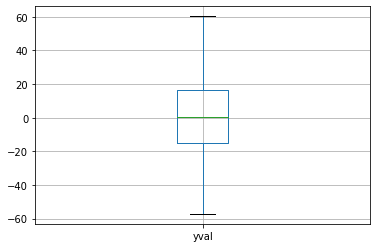

In [185]:
print('\n * Distribution of the second feature (yval) *\n')
df.boxplot(column=['yval'])

###### The box plots show that both the firt and second feature seem to be normally distributed around the same median. Both seem to have similar max and min values. 

In [186]:
print('\n * Feature Destributions *\n')
df.describe()


 * Feature Destributions *



,xval,yval
count,685.000000,685.000000
mean,0.596296,1.079071
std,18.941957,18.789436
min,-54.531886,-57.232861
25%,-16.376391,-14.788019
50%,0.387794,0.474620
75%,17.255583,16.628887
max,58.905065,60.321524


--------------------
## Test / Train Set Creation

Test and train sets were made using train_test_split 

---------------

In [211]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

X = df.drop(['color'], axis='columns')
y = df['color']


"''\nnames = ['r', 'g', 'b']\nfeature_names = ['xval','yval']\n\n# One hot encoding\nenc = OneHotEncoder()\nY = enc.fit_transform(y[:, np.newaxis]).toarray()\n\n# Scale data to have mean 0 and variance 1 \n# which is importance for convergence of the neural network\nscaler = StandardScaler()\nX_scaled = scaler.fit_transform(X)\n\n# Split the data set into training and testing\nX_train, X_test, y_train, y_test = train_test_split(\n    X_scaled, Y, test_size=0.5, random_state=2)\n\nn_features = X.shape[1]\nn_classes = Y.shape[1]\n"

In [212]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

In [213]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scalar.fit(X_train)
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

----------

#### Reusable Evaluation Function
INCLUDES: Acuracy, Confusion Matrix, Percision, Recall, F score.

I will be using this to evaluate all of the models run from here on out. 

---------

In [246]:
import itertools


def Eval (model):

    predictions = model.predict(X_test)




    def plot_confusion_matrix(cm, classes,
                              normalize=False,
                              title='Confusion matrix',
                              cmap=plt.cm.Blues):
        """
        This function prints and plots the confusion matrix.
        Normalization can be applied by setting normalize=True.
        """
        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            print("\nNormalized confusion matrix")
        else:
            print('\nConfusion matrix, without normalization')

        #print(cm)

        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

        fmt = '.2f' if normalize else 'd'
        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')



    
    print ("\nTrain Accuracy : ", accuracy_score(y_train, model.predict(X_train)))
    print ("\nTest Accuracy  : ", accuracy_score(y_test, predictions))
    cm = confusion_matrix(y_test, predictions)
    #print (" Confusion matrix ", confmat)

        #plots confusion matrix non-normalized
    #cm = confusion_matrix(y_test, predictions)
    plot_confusion_matrix(cm, ['b','g', 'r'])
    plt.show()

    #plots confusion matrix normalized
    plot_confusion_matrix(cm, ['b','g', 'r'], normalize=True)
    plt.show()

    
    from sklearn.metrics import classification_report
    
    print("\nCLASSIFICATION REPORT WITH PERCISION AND REACALL\n")
    target_names = ['b','g', 'r']
    print(classification_report(y_test, predictions, target_names=target_names))
    
    

### RUNNING NEURAL NETWORKS

#### Experiments: 

Now we will run several model configurations. 

1  We will increase the number of neurons for a 3 layered network.

2  Experiment with different activation functions.

3  Increase the number of layers.



### 1 Increase number of neurons

In [247]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(100,100,100), random_state=1, max_iter= 1000)
print('model paramenters:\n \n',clf)
neuralnetwork= clf.fit(X_train, y_train)  

print('\n ***** PARAMETER MODIFICATIONS *****\n')

print('\n * NUMBER OF HIDDEN LAYERS :',len(clf.hidden_layer_sizes),' *\n')
print('\n * SIZE OF EACH LAYER (LAYER 1, LAYER 2, ...) :',clf.hidden_layer_sizes,' *\n')
print('\n * CURRENT ACTIVATION FUNCTION :',clf.activation,' *\n')


model paramenters:
 
 MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100, 100), learning_rate='constant',
              learning_rate_init=0.001, max_iter=1000, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

 ***** PARAMETER MODIFICATIONS *****


 * NUMBER OF HIDDEN LAYERS : 3  *


 * SIZE OF EACH LAYER (LAYER 1, LAYER 2, ...) : (100, 100, 100)  *


 * CURRENT ACTIVATION FUNCTION : relu  *




Train Accuracy :  1.0

Test Accuracy  :  0.9927007299270073

Confusion matrix, without normalization


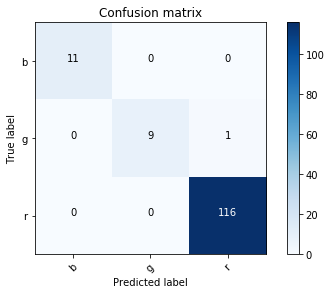


Normalized confusion matrix


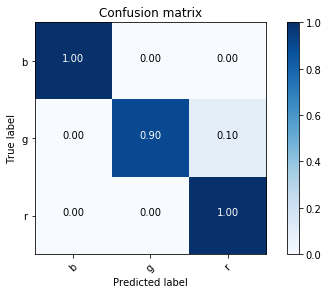


CLASSIFICATION REPORT WITH PERCISION AND REACALL

              precision    recall  f1-score   support

           b       1.00      1.00      1.00        11
           g       1.00      0.90      0.95        10
           r       0.99      1.00      1.00       116

    accuracy                           0.99       137
   macro avg       1.00      0.97      0.98       137
weighted avg       0.99      0.99      0.99       137



In [248]:
Eval(neuralnetwork)


 ***** PARAMETER MODIFICATIONS *****


 * NUMBER OF HIDDEN LAYERS : 3  *


 * SIZE OF EACH LAYER (LAYER 1, LAYER 2, ...) : (500, 500, 500)  *


 * CURRENT ACTIVATION FUNCTION : relu  *


Train Accuracy :  0.9233576642335767

Test Accuracy  :  0.9051094890510949

Confusion matrix, without normalization


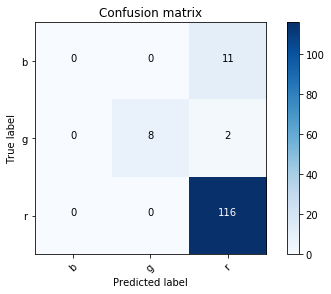


Normalized confusion matrix


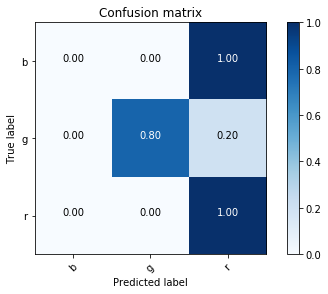


CLASSIFICATION REPORT WITH PERCISION AND REACALL

              precision    recall  f1-score   support

           b       0.00      0.00      0.00        11
           g       1.00      0.80      0.89        10
           r       0.90      1.00      0.95       116

    accuracy                           0.91       137
   macro avg       0.63      0.60      0.61       137
weighted avg       0.83      0.91      0.87       137



/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [249]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(500,500,500), random_state=1, max_iter= 1000)
neuralnetwork= clf.fit(X_train, y_train)  

print('\n ***** PARAMETER MODIFICATIONS *****\n')

print('\n * NUMBER OF HIDDEN LAYERS :',len(clf.hidden_layer_sizes),' *\n')
print('\n * SIZE OF EACH LAYER (LAYER 1, LAYER 2, ...) :',clf.hidden_layer_sizes,' *\n')
print('\n * CURRENT ACTIVATION FUNCTION :',clf.activation,' *\n')
Eval(neuralnetwork)


 ***** PARAMETER MODIFICATIONS *****


 * NUMBER OF HIDDEN LAYERS : 3  *


 * SIZE OF EACH LAYER (LAYER 1, LAYER 2, ...) : (1000, 1000, 1000)  *


 * CURRENT ACTIVATION FUNCTION : relu  *


Train Accuracy :  1.0

Test Accuracy  :  0.9927007299270073

Confusion matrix, without normalization


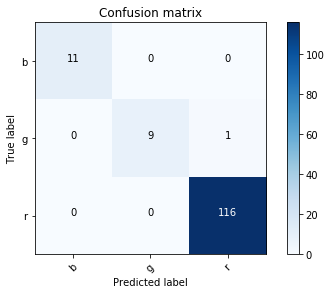


Normalized confusion matrix


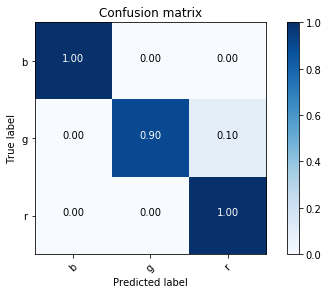


CLASSIFICATION REPORT WITH PERCISION AND REACALL

              precision    recall  f1-score   support

           b       1.00      1.00      1.00        11
           g       1.00      0.90      0.95        10
           r       0.99      1.00      1.00       116

    accuracy                           0.99       137
   macro avg       1.00      0.97      0.98       137
weighted avg       0.99      0.99      0.99       137



In [250]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(1000,1000,1000), random_state=1, max_iter= 1000)
neuralnetwork= clf.fit(X_train, y_train)  

print('\n ***** PARAMETER MODIFICATIONS *****\n')

print('\n * NUMBER OF HIDDEN LAYERS :',len(clf.hidden_layer_sizes),' *\n')
print('\n * SIZE OF EACH LAYER (LAYER 1, LAYER 2, ...) :',clf.hidden_layer_sizes,' *\n')
print('\n * CURRENT ACTIVATION FUNCTION :',clf.activation,' *\n')
Eval(neuralnetwork)

#### Results: 

For whatever reason, using more neurons did not directly translate to better outcomes. In the case of going from 100 to 500 actually reduced the accuracy of our model.

### Changing the Activation Function


 ***** PARAMETER MODIFICATIONS *****


 * NUMBER OF HIDDEN LAYERS : 3  *


 * SIZE OF EACH LAYER (LAYER 1, LAYER 2, ...) : (100, 100, 100)  *


 * CURRENT ACTIVATION FUNCTION : identity  *


Train Accuracy :  0.8558394160583942

Test Accuracy  :  0.8467153284671532

Confusion matrix, without normalization


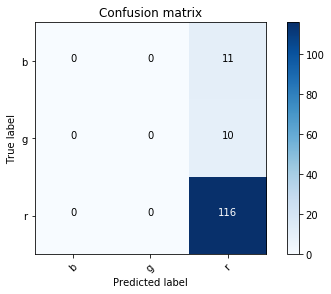


Normalized confusion matrix


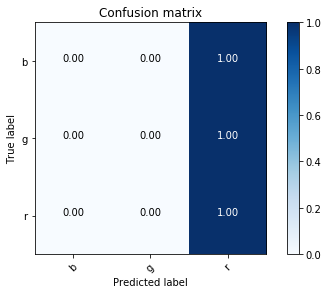


CLASSIFICATION REPORT WITH PERCISION AND REACALL

              precision    recall  f1-score   support

           b       0.00      0.00      0.00        11
           g       0.00      0.00      0.00        10
           r       0.85      1.00      0.92       116

    accuracy                           0.85       137
   macro avg       0.28      0.33      0.31       137
weighted avg       0.72      0.85      0.78       137



/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [252]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(activation='identity', solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(100,100,100), random_state=1, max_iter= 1000)
neuralnetwork= clf.fit(X_train, y_train)  

print('\n ***** PARAMETER MODIFICATIONS *****\n')

print('\n * NUMBER OF HIDDEN LAYERS :',len(clf.hidden_layer_sizes),' *\n')
print('\n * SIZE OF EACH LAYER (LAYER 1, LAYER 2, ...) :',clf.hidden_layer_sizes,' *\n')
print('\n * CURRENT ACTIVATION FUNCTION :',clf.activation,' *\n')
Eval(neuralnetwork)


 ***** PARAMETER MODIFICATIONS *****


 * NUMBER OF HIDDEN LAYERS : 3  *


 * SIZE OF EACH LAYER (LAYER 1, LAYER 2, ...) : (100, 100, 100)  *


 * CURRENT ACTIVATION FUNCTION : logistic  *


Train Accuracy :  0.8558394160583942

Test Accuracy  :  0.8467153284671532

Confusion matrix, without normalization


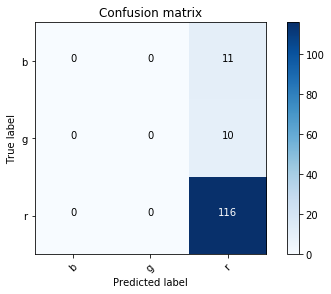


Normalized confusion matrix


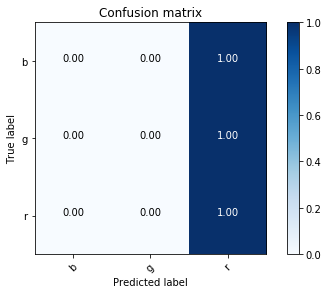


CLASSIFICATION REPORT WITH PERCISION AND REACALL

              precision    recall  f1-score   support

           b       0.00      0.00      0.00        11
           g       0.00      0.00      0.00        10
           r       0.85      1.00      0.92       116

    accuracy                           0.85       137
   macro avg       0.28      0.33      0.31       137
weighted avg       0.72      0.85      0.78       137



/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [253]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(activation='logistic', solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(100,100,100), random_state=1, max_iter= 1000)
neuralnetwork= clf.fit(X_train, y_train)  

print('\n ***** PARAMETER MODIFICATIONS *****\n')

print('\n * NUMBER OF HIDDEN LAYERS :',len(clf.hidden_layer_sizes),' *\n')
print('\n * SIZE OF EACH LAYER (LAYER 1, LAYER 2, ...) :',clf.hidden_layer_sizes,' *\n')
print('\n * CURRENT ACTIVATION FUNCTION :',clf.activation,' *\n')
Eval(neuralnetwork)


 ***** PARAMETER MODIFICATIONS *****


 * NUMBER OF HIDDEN LAYERS : 3  *


 * SIZE OF EACH LAYER (LAYER 1, LAYER 2, ...) : (100, 100, 100)  *


 * CURRENT ACTIVATION FUNCTION : tanh  *


Train Accuracy :  1.0

Test Accuracy  :  0.9854014598540146

Confusion matrix, without normalization


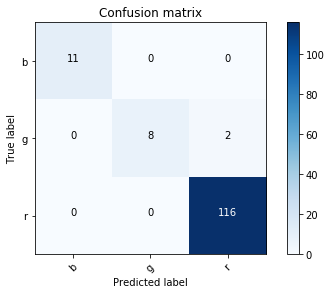


Normalized confusion matrix


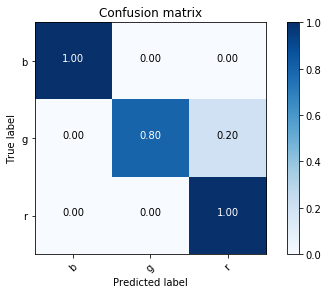


CLASSIFICATION REPORT WITH PERCISION AND REACALL

              precision    recall  f1-score   support

           b       1.00      1.00      1.00        11
           g       1.00      0.80      0.89        10
           r       0.98      1.00      0.99       116

    accuracy                           0.99       137
   macro avg       0.99      0.93      0.96       137
weighted avg       0.99      0.99      0.98       137



In [254]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(activation='tanh', solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(100,100,100), random_state=1, max_iter= 1000)
neuralnetwork= clf.fit(X_train, y_train)  

print('\n ***** PARAMETER MODIFICATIONS *****\n')

print('\n * NUMBER OF HIDDEN LAYERS :',len(clf.hidden_layer_sizes),' *\n')
print('\n * SIZE OF EACH LAYER (LAYER 1, LAYER 2, ...) :',clf.hidden_layer_sizes,' *\n')
print('\n * CURRENT ACTIVATION FUNCTION :',clf.activation,' *\n')
Eval(neuralnetwork)

#### Results: 

Of the 3 different activation functions that I used tanh had the best result, however, the Relu function that I had ran previously actually had ran previously had the best outcome so far.

# Changing number of layers


 ***** PARAMETER MODIFICATIONS *****


 * NUMBER OF HIDDEN LAYERS : 2  *


 * SIZE OF EACH LAYER (LAYER 1, LAYER 2, ...) : (100, 100)  *


 * CURRENT ACTIVATION FUNCTION : relu  *


Train Accuracy :  1.0

Test Accuracy  :  0.9854014598540146

Confusion matrix, without normalization


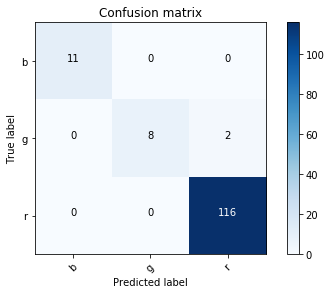


Normalized confusion matrix


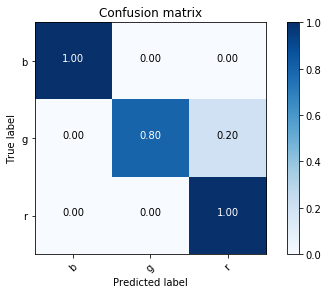


CLASSIFICATION REPORT WITH PERCISION AND REACALL

              precision    recall  f1-score   support

           b       1.00      1.00      1.00        11
           g       1.00      0.80      0.89        10
           r       0.98      1.00      0.99       116

    accuracy                           0.99       137
   macro avg       0.99      0.93      0.96       137
weighted avg       0.99      0.99      0.98       137



In [257]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(activation='relu', solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(100,100), random_state=1, max_iter= 1000)
neuralnetwork= clf.fit(X_train, y_train)  

print('\n ***** PARAMETER MODIFICATIONS *****\n')

print('\n * NUMBER OF HIDDEN LAYERS :',len(clf.hidden_layer_sizes),' *\n')
print('\n * SIZE OF EACH LAYER (LAYER 1, LAYER 2, ...) :',clf.hidden_layer_sizes,' *\n')
print('\n * CURRENT ACTIVATION FUNCTION :',clf.activation,' *\n')
Eval(neuralnetwork)


 ***** PARAMETER MODIFICATIONS *****


 * NUMBER OF HIDDEN LAYERS : 5  *


 * SIZE OF EACH LAYER (LAYER 1, LAYER 2, ...) : (100, 100, 100, 100, 100)  *


 * CURRENT ACTIVATION FUNCTION : relu  *


Train Accuracy :  1.0

Test Accuracy  :  1.0

Confusion matrix, without normalization


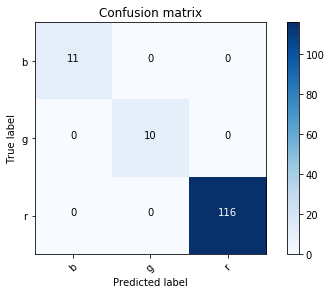


Normalized confusion matrix


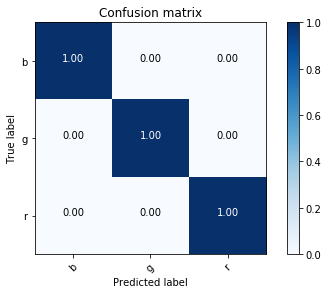


CLASSIFICATION REPORT WITH PERCISION AND REACALL

              precision    recall  f1-score   support

           b       1.00      1.00      1.00        11
           g       1.00      1.00      1.00        10
           r       1.00      1.00      1.00       116

    accuracy                           1.00       137
   macro avg       1.00      1.00      1.00       137
weighted avg       1.00      1.00      1.00       137



In [258]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(activation='relu', solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(100,100,100,100,100), random_state=1, max_iter= 1000)
neuralnetwork= clf.fit(X_train, y_train)  

print('\n ***** PARAMETER MODIFICATIONS *****\n')

print('\n * NUMBER OF HIDDEN LAYERS :',len(clf.hidden_layer_sizes),' *\n')
print('\n * SIZE OF EACH LAYER (LAYER 1, LAYER 2, ...) :',clf.hidden_layer_sizes,' *\n')
print('\n * CURRENT ACTIVATION FUNCTION :',clf.activation,' *\n')
Eval(neuralnetwork)


 ***** PARAMETER MODIFICATIONS *****


 * NUMBER OF HIDDEN LAYERS : 9  *


 * SIZE OF EACH LAYER (LAYER 1, LAYER 2, ...) : (100, 100, 100, 100, 100, 100, 100, 100, 100)  *


 * CURRENT ACTIVATION FUNCTION : relu  *


Train Accuracy :  0.8941605839416058

Test Accuracy  :  0.8905109489051095

Confusion matrix, without normalization


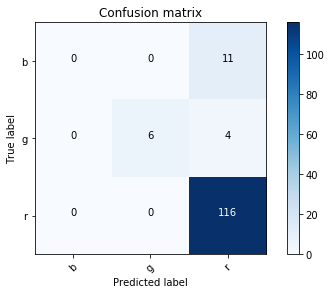


Normalized confusion matrix


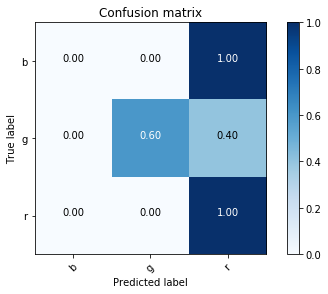


CLASSIFICATION REPORT WITH PERCISION AND REACALL

              precision    recall  f1-score   support

           b       0.00      0.00      0.00        11
           g       1.00      0.60      0.75        10
           r       0.89      1.00      0.94       116

    accuracy                           0.89       137
   macro avg       0.63      0.53      0.56       137
weighted avg       0.82      0.89      0.85       137



/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [259]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(activation='relu', solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(100,100,100,100,100,100,100,100,100), random_state=1, max_iter= 1000)
neuralnetwork= clf.fit(X_train, y_train)  

print('\n ***** PARAMETER MODIFICATIONS *****\n')

print('\n * NUMBER OF HIDDEN LAYERS :',len(clf.hidden_layer_sizes),' *\n')
print('\n * SIZE OF EACH LAYER (LAYER 1, LAYER 2, ...) :',clf.hidden_layer_sizes,' *\n')
print('\n * CURRENT ACTIVATION FUNCTION :',clf.activation,' *\n')
Eval(neuralnetwork)

#### Results: 

USING RELU WITH 5 LAYERS OF 100 NEURONS I ACHIEVED 100% ACCURACY!

# Conclustions:

The least complex and most accurate model configuration that I have run thus far has been the following:

Number of hidden layers: 5

Number of neurons for each layer: 100, 100, 100

Activation Funcltion: Relu



# PART 2

# 1. {X3,X4}



 ***** PARAMETER MODIFICATIONS *****


 * NUMBER OF HIDDEN LAYERS : 3  *


 * SIZE OF EACH LAYER (LAYER 1, LAYER 2, ...) : (100, 100, 100)  *


 * CURRENT ACTIVATION FUNCTION : relu  *


Train Accuracy :  1.0

Test Accuracy  :  0.9927007299270073

Confusion matrix, without normalization


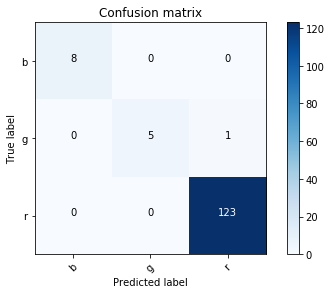


Normalized confusion matrix


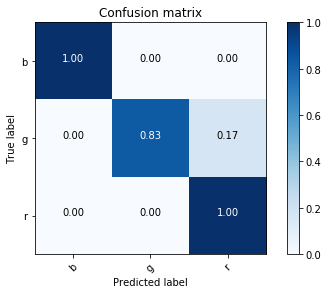


CLASSIFICATION REPORT WITH PERCISION AND REACALL

              precision    recall  f1-score   support

           b       1.00      1.00      1.00         8
           g       1.00      0.83      0.91         6
           r       0.99      1.00      1.00       123

    accuracy                           0.99       137
   macro avg       1.00      0.94      0.97       137
weighted avg       0.99      0.99      0.99       137



In [267]:
data = pd.read_csv('train_setpreped.csv')
x = data.drop(['xval', 'yval','x5','color'], axis='columns')
y = data['color']
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.20)
scalar = StandardScaler()
scalar.fit(X_train)
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(100,100,100), random_state=1, max_iter= 1000)
neuralnetwork= clf.fit(X_train, y_train)  

print('\n ***** PARAMETER MODIFICATIONS *****\n')

print('\n * NUMBER OF HIDDEN LAYERS :',len(clf.hidden_layer_sizes),' *\n')
print('\n * SIZE OF EACH LAYER (LAYER 1, LAYER 2, ...) :',clf.hidden_layer_sizes,' *\n')
print('\n * CURRENT ACTIVATION FUNCTION :',clf.activation,' *\n')
Eval(neuralnetwork)

# 2. {X3,X5}



 ***** PARAMETER MODIFICATIONS *****


 * NUMBER OF HIDDEN LAYERS : 3  *


 * SIZE OF EACH LAYER (LAYER 1, LAYER 2, ...) : (100, 100, 100)  *


 * CURRENT ACTIVATION FUNCTION : relu  *


Train Accuracy :  0.9963503649635036

Test Accuracy  :  0.9854014598540146

Confusion matrix, without normalization


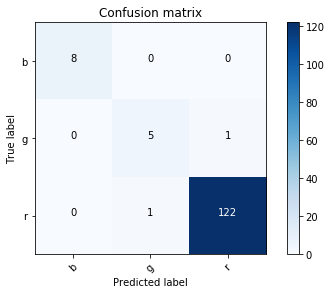


Normalized confusion matrix


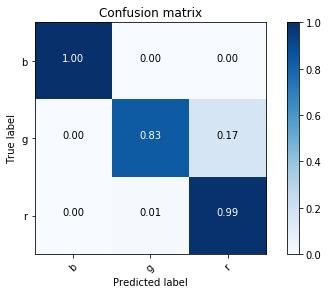


CLASSIFICATION REPORT WITH PERCISION AND REACALL

              precision    recall  f1-score   support

           b       1.00      1.00      1.00         8
           g       0.83      0.83      0.83         6
           r       0.99      0.99      0.99       123

    accuracy                           0.99       137
   macro avg       0.94      0.94      0.94       137
weighted avg       0.99      0.99      0.99       137



In [268]:
data = pd.read_csv('train_setpreped.csv')
x = data.drop(['xval', 'yval','x4','color'], axis='columns')
y = data['color']
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.20)
scalar = StandardScaler()
scalar.fit(X_train)
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(100,100,100), random_state=1, max_iter= 1000)
neuralnetwork= clf.fit(X_train, y_train)  

print('\n ***** PARAMETER MODIFICATIONS *****\n')

print('\n * NUMBER OF HIDDEN LAYERS :',len(clf.hidden_layer_sizes),' *\n')
print('\n * SIZE OF EACH LAYER (LAYER 1, LAYER 2, ...) :',clf.hidden_layer_sizes,' *\n')
print('\n * CURRENT ACTIVATION FUNCTION :',clf.activation,' *\n')
Eval(neuralnetwork)

# 3. {X3,X4,X5}



 ***** PARAMETER MODIFICATIONS *****


 * NUMBER OF HIDDEN LAYERS : 3  *


 * SIZE OF EACH LAYER (LAYER 1, LAYER 2, ...) : (100, 100, 100)  *


 * CURRENT ACTIVATION FUNCTION : relu  *


Train Accuracy :  1.0

Test Accuracy  :  0.9927007299270073

Confusion matrix, without normalization


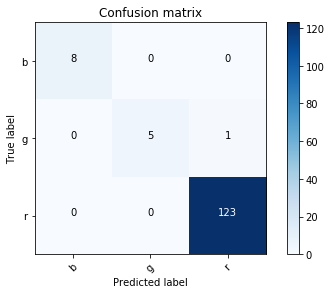


Normalized confusion matrix


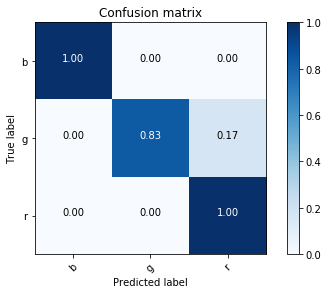


CLASSIFICATION REPORT WITH PERCISION AND REACALL

              precision    recall  f1-score   support

           b       1.00      1.00      1.00         8
           g       1.00      0.83      0.91         6
           r       0.99      1.00      1.00       123

    accuracy                           0.99       137
   macro avg       1.00      0.94      0.97       137
weighted avg       0.99      0.99      0.99       137



In [272]:
data = pd.read_csv('train_setpreped.csv')
x = data.drop(['xval','yval','color'], axis='columns')
y = data['color']
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.20)
scalar = StandardScaler()
scalar.fit(X_train)
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(100,100,100), random_state=1, max_iter= 1000)
neuralnetwork= clf.fit(X_train, y_train)  

print('\n ***** PARAMETER MODIFICATIONS *****\n')

print('\n * NUMBER OF HIDDEN LAYERS :',len(clf.hidden_layer_sizes),' *\n')
print('\n * SIZE OF EACH LAYER (LAYER 1, LAYER 2, ...) :',clf.hidden_layer_sizes,' *\n')
print('\n * CURRENT ACTIVATION FUNCTION :',clf.activation,' *\n')
Eval(neuralnetwork)

# 4. {X1,X2,X3,X4,X5}


 ***** PARAMETER MODIFICATIONS *****


 * NUMBER OF HIDDEN LAYERS : 3  *


 * SIZE OF EACH LAYER (LAYER 1, LAYER 2, ...) : (100, 100, 100)  *


 * CURRENT ACTIVATION FUNCTION : relu  *


Train Accuracy :  1.0

Test Accuracy  :  0.9781021897810219

Confusion matrix, without normalization


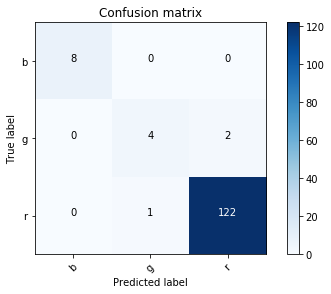


Normalized confusion matrix


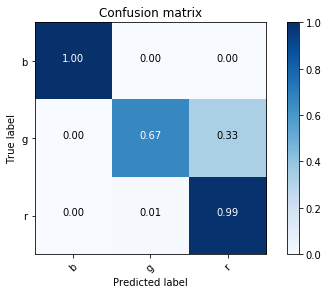


CLASSIFICATION REPORT WITH PERCISION AND REACALL

              precision    recall  f1-score   support

           b       1.00      1.00      1.00         8
           g       0.80      0.67      0.73         6
           r       0.98      0.99      0.99       123

    accuracy                           0.98       137
   macro avg       0.93      0.89      0.91       137
weighted avg       0.98      0.98      0.98       137



In [273]:
data = pd.read_csv('train_setpreped.csv')
x = data.drop(['color'], axis='columns')
y = data['color']
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.20)
scalar = StandardScaler()
scalar.fit(X_train)
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(100,100,100), random_state=1, max_iter= 1000)
neuralnetwork= clf.fit(X_train, y_train)  

print('\n ***** PARAMETER MODIFICATIONS *****\n')

print('\n * NUMBER OF HIDDEN LAYERS :',len(clf.hidden_layer_sizes),' *\n')
print('\n * SIZE OF EACH LAYER (LAYER 1, LAYER 2, ...) :',clf.hidden_layer_sizes,' *\n')
print('\n * CURRENT ACTIVATION FUNCTION :',clf.activation,' *\n')
Eval(neuralnetwork)

## Final thoughts. 

The best model performing feature set was the first with just X3,x4 with an accuracy of 99.27%. In this case increasing the number of features did not neccessraily lead to a better outcome. Regardless nearly all models ran in this reopor had relatively high accuracy, recall, and percision. This is either due to the simplicity of the data set (paterns in the data seem to be mathematic in nature) or the fact that neural nets perform very well in this type of application. Using 5 layers of 100 neurons with relu I was actually able to achieve 100% acuracy on the original data set.